## Import Library

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import duckdb

## Create Dataframe

In [33]:
transactions_data = {
    'campaign_id': [301, 301, 302, 303, 304],
    'transaction_id': [1, 2, 3, 4, 5],
    'amount': [200, 150, 350, 500, 300],
    'transaction_date': ['2024-01-05', '2024-01-06', '2024-01-12', '2024-03-10', '2024-04-05'],
    'customer_id': ['e7751463-0879-45d8-86fe-c4612542176e', '84855a69-9e05-4adf-b4c8-5b1c9e083279', '64245183-ece7-427e-bbb7-ccc60c85cbe7', 'caac8e8d-0680-4664-a5b3-370e85d28e66', '2b3c9077-dbf0-42ea-872f-265710d5f6c8'],
    'gender': ['Female', 'Female', 'Male', 'Male', 'Female'],
    'age': [41, 38, 35, 63, 31],
    'product_category': ['Groceries', 'Health & Beauty', 'Health & Beauty', 'Groceries', 'Electronics']
}
campaigns_data = {
    'campaign_id': [301, 302, 303, 304],
    'campaign_name': ['Holiday Sale', 'New Year Promo', 'Spring Discount', 'Clearance Sale'],
    'start_date': ['2024-01-01', '2024-01-10', '2024-03-01', '2024-04-01'],
    'end_date': ['2024-01-15', '2024-01-20', '2024-03-15', '2024-04-15'],
    'budget': [5000, 7000, 6000, 4000],
    'target_audience': ['All Customers', 'New Customers', 'Loyal Customers', 'All Customers']
}
metrics_data = {
    'campaign_id': [301, 302, 303, 304],
    'Clicks': [5000, 3500, 4000, 2000],
    'Impressions': [50000, 70000, 60000, 40000],
    'website_landing_hits': [48303, 42038, 48310, 23293]
}
transactions_df = pd.DataFrame(transactions_data)
campaigns_df = pd.DataFrame(campaigns_data)
metrics_df = pd.DataFrame(metrics_data)

## Initiate Duckdb

In [34]:
con = duckdb.connect(database=':memory:', read_only=False)

In [ ]:
try:
    con.register('transactions_table', transactions_df)
    con.register('campaigns_table', campaigns_df)
    con.register('metrics_table', metrics_df)

    # All joins are on 'campaign_id'
    joined_df = con.execute("""
        SELECT
            t.*,
            c.campaign_name,
            c.start_date,
            c.end_date,
            c.budget,
            c.target_audience,
            m.Clicks,
            m.Impressions,
            m.website_landing_hits
        FROM
            transactions_table AS t
        JOIN
            campaigns_table AS c ON t.campaign_id = c.campaign_id
        JOIN
            metrics_table AS m ON t.campaign_id = m.campaign_id
        ORDER BY
            t.campaign_id, t.transaction_id
    """).fetchdf()
    mask_for_blanks = joined_df.duplicated(subset=['campaign_id'], keep='first')

    columns_to_blank = ['budget', 'Clicks', 'Impressions', 'website_landing_hits']

    joined_df.loc[mask_for_blanks, columns_to_blank] = None

    print("Successfully joined and formatted dataframes:")
    print(joined_df.to_string())

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    con.close()

Successfully joined and formatted dataframes:
   campaign_id  transaction_id  amount transaction_date                           customer_id  gender  age product_category    campaign_name  start_date    end_date  budget  target_audience  Clicks  Impressions  website_landing_hits
0          301               1     200       2024-01-05  e7751463-0879-45d8-86fe-c4612542176e  Female   41        Groceries     Holiday Sale  2024-01-01  2024-01-15  5000.0    All Customers  5000.0      50000.0               48303.0
1          301               2     150       2024-01-06  84855a69-9e05-4adf-b4c8-5b1c9e083279  Female   38  Health & Beauty     Holiday Sale  2024-01-01  2024-01-15     NaN    All Customers     NaN          NaN                   NaN
2          302               3     350       2024-01-12  64245183-ece7-427e-bbb7-ccc60c85cbe7    Male   35  Health & Beauty   New Year Promo  2024-01-10  2024-01-20  7000.0    New Customers  3500.0      70000.0               42038.0
3          303        

In [36]:
joined_df

,campaign_id,transaction_id,amount,transaction_date,customer_id,gender,age,product_category,campaign_name,start_date,end_date,budget,target_audience,Clicks,Impressions,website_landing_hits
0,301,1,200,2024-01-05,e7751463-0879-45d8-86fe-c4612542176e,Female,41,Groceries,Holiday Sale,2024-01-01,2024-01-15,5000.0,All Customers,5000.0,50000.0,48303.0
1,301,2,150,2024-01-06,84855a69-9e05-4adf-b4c8-5b1c9e083279,Female,38,Health & Beauty,Holiday Sale,2024-01-01,2024-01-15,NaN,All Customers,NaN,NaN,NaN
2,302,3,350,2024-01-12,64245183-ece7-427e-bbb7-ccc60c85cbe7,Male,35,Health & Beauty,New Year Promo,2024-01-10,2024-01-20,7000.0,New Customers,3500.0,70000.0,42038.0
3,303,4,500,2024-03-10,caac8e8d-0680-4664-a5b3-370e85d28e66,Male,63,Groceries,Spring Discount,2024-03-01,2024-03-15,6000.0,Loyal Customers,4000.0,60000.0,48310.0
4,304,5,300,2024-04-05,2b3c9077-dbf0-42ea-872f-265710d5f6c8,Female,31,Electronics,Clearance Sale,2024-04-01,2024-04-15,4000.0,All Customers,2000.0,40000.0,23293.0


## Choosing Campaign (301 or Holiday Sale)

In [37]:
# Select Campaign 301
campaign_id_choosen = 301
joined_df_301 = joined_df[joined_df['campaign_id'] == campaign_id_choosen]

# Convert transaction_date to datetime for potential time-based analysis
joined_df_301['transaction_date'] = pd.to_datetime(joined_df_301['transaction_date'])

C:\Users\bobse\AppData\Local\Temp\ipykernel_42288\1701677425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df_301['transaction_date'] = pd.to_datetime(joined_df_301['transaction_date'])


In [38]:
joined_df_301

,campaign_id,transaction_id,amount,transaction_date,customer_id,gender,age,product_category,campaign_name,start_date,end_date,budget,target_audience,Clicks,Impressions,website_landing_hits
0,301,1,200,2024-01-05,e7751463-0879-45d8-86fe-c4612542176e,Female,41,Groceries,Holiday Sale,2024-01-01,2024-01-15,5000.0,All Customers,5000.0,50000.0,48303.0
1,301,2,150,2024-01-06,84855a69-9e05-4adf-b4c8-5b1c9e083279,Female,38,Health & Beauty,Holiday Sale,2024-01-01,2024-01-15,NaN,All Customers,NaN,NaN,NaN


## Calculating Metrics

In [39]:
if not joined_df_301.empty:
    # Get the budget, clicks, and website_landing_hits from the first non-NaN entry
    valid_metrics_row = joined_df_301.dropna(subset=columns_to_blank).iloc[0]

    budget_301 = valid_metrics_row['budget'].astype(int)
    clicks_301 = valid_metrics_row['Clicks'].astype(int)
    website_landing_hits_301 = valid_metrics_row['website_landing_hits'].astype(int)
    
    # Sum the 'amount' from all transactions for Campaign 301
    total_revenue_301 = joined_df_301['amount'].sum()

    # Calculate CPC
    cpc_301 = budget_301 / clicks_301 if clicks_301 > 0 else 0

    # Calculate ROI
    roi_301 = (total_revenue_301 - budget_301) / budget_301 if budget_301 > 0 else float('-inf')

    # Calculate Bounce Rate (Landing Page Drop-off Rate)
    bounce_rate_301 = (100 / (website_landing_hits_301 / clicks_301)) / 100 if clicks_301 > 0 else 0

    print(f"\n--- Campaign {campaign_id_choosen} Performance Metrics ---")
    print(f"Cost Per Click (CPC): ${cpc_301:.2f}")
    print(f"Return On Investment (ROI): {roi_301:.2f}")
    print(f"Bounce Rate: {bounce_rate_301:.2%}")
else:
    print(f"\nNo data found for Campaign {campaign_id_choosen} to calculate CPC, ROI, and Bounce Rate.")


--- Campaign 301 Performance Metrics ---
Cost Per Click (CPC): $1.00
Return On Investment (ROI): -0.93
Bounce Rate: 10.35%


### Interpretation of Metrics :
- Cost Per Click (CPC): $1.00

This means every time someone clicked on our Holiday Sale ad, it cost us one dollar. It tells us how much we paid for each person who showed interest by clicking.

- Return On Investment (ROI): -0.93

This is a big problem. An ROI of -0.93 means we lost money on this campaign. For every dollar we spent, we got back only 7 cents (1 - 0.93 = 0.07). So, we lost 93 cents for every dollar invested. This campaign didn't make us money; it cost us.

- Bounce Rate: 10.35%

Means that out of all the visitors who landed on your website, only 10.35% left after viewing just one page. Conversely, a high percentage (89.65%) of visitors continued to browse other pages on your site. This is generally a very good sign, as it suggests that the vast majority of visitors found your landing page engaging or relevant enough to explore further.

## Engagement Trends Over Time

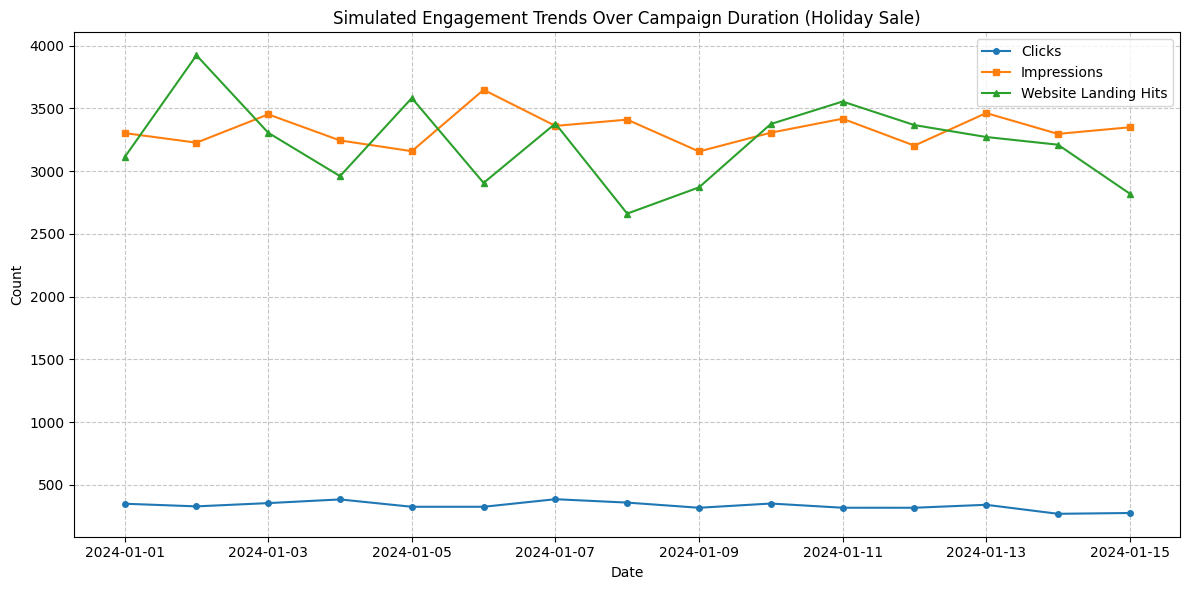

In [ ]:
campaign_info_row = joined_df_301.iloc[0]

start_date = campaign_info_row['start_date']
end_date = campaign_info_row['end_date']

total_clicks = joined_df_301['Clicks'].dropna().iloc[0]
total_impressions = joined_df_301['Impressions'].dropna().iloc[0]
total_website_hits = joined_df_301['website_landing_hits'].dropna().iloc[0]

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
num_days = len(date_range)

np.random.seed(42)
daily_clicks_base = total_clicks / num_days
daily_impressions_base = total_impressions / num_days
daily_website_hits_base = total_website_hits / num_days

daily_clicks = daily_clicks_base + np.random.normal(0, daily_clicks_base * 0.1, num_days)
daily_impressions = daily_impressions_base + np.random.normal(0, daily_impressions_base * 0.05, num_days)
daily_website_hits = daily_website_hits_base + np.random.normal(0, daily_website_hits_base * 0.1, num_days)

daily_clicks = np.maximum(daily_clicks, 0)
daily_impressions = np.maximum(daily_impressions, 0)
daily_website_hits = np.maximum(daily_website_hits, 0)

daily_clicks = daily_clicks * (total_clicks / daily_clicks.sum())
daily_impressions = daily_impressions * (total_impressions / daily_impressions.sum())
daily_website_hits = daily_website_hits * (total_website_hits / daily_website_hits.sum())

engagement_data = pd.DataFrame({
    'Date': date_range,
    'Clicks': daily_clicks,
    'Impressions': daily_impressions,
    'Website Landing Hits': daily_website_hits
})

# Plotting Engagement Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(engagement_data['Date'], engagement_data['Clicks'], label='Clicks', marker='o', markersize=4)
plt.plot(engagement_data['Date'], engagement_data['Impressions'], label='Impressions', marker='s', markersize=4)
plt.plot(engagement_data['Date'], engagement_data['Website Landing Hits'], label='Website Landing Hits', marker='^', markersize=4)
plt.title('Simulated Engagement Trends Over Campaign Duration (Holiday Sale)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_trends_over_time.png')
# plt.close()

## Customer Segments Comparison (New vs Repeat)

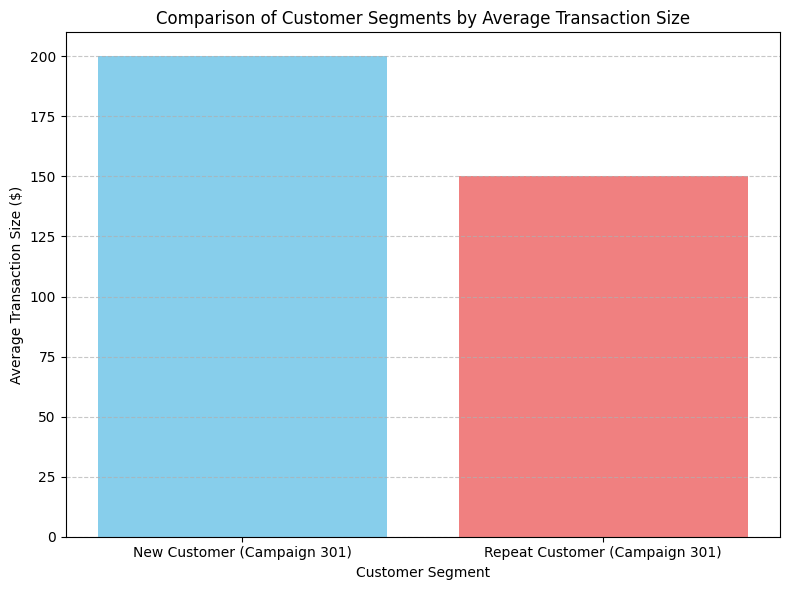

In [41]:
new_customer_avg_transaction = joined_df_301.loc[0, 'amount'] # Amount for the first transaction (Groceries)
repeat_customer_avg_transaction = joined_df_301.loc[1, 'amount'] # Amount for the second transaction (Health & Beauty)

customer_segments_data = pd.DataFrame({
    'Segment': ['New Customer (Campaign 301)', 'Repeat Customer (Campaign 301)'],
    'Average Transaction Size': [new_customer_avg_transaction, repeat_customer_avg_transaction]
})

# Plotting Comparison of Customer Segments by Average Transaction Size
plt.figure(figsize=(8, 6))
plt.bar(customer_segments_data['Segment'], customer_segments_data['Average Transaction Size'], color=['skyblue', 'lightcoral'])
plt.title('Comparison of Customer Segments by Average Transaction Size')
plt.xlabel('Customer Segment')
plt.ylabel('Average Transaction Size ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('customer_segments_comparison.png')
plt.show()
# plt.close()

## Piechart for category sales proportion

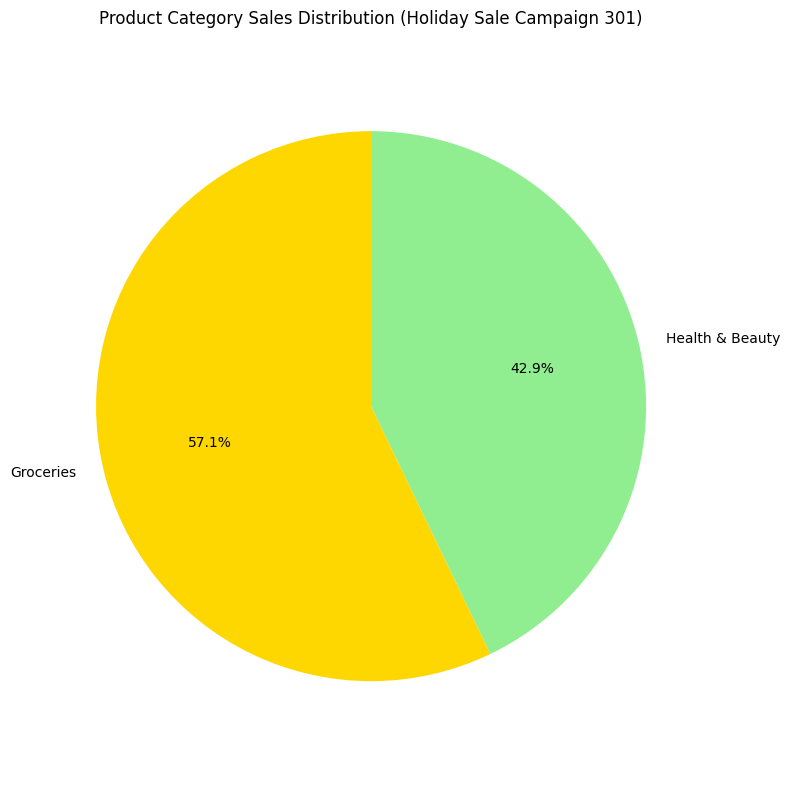

In [42]:
product_sales_summary = joined_df_301.groupby('product_category')['amount'].sum().reset_index()

# Plotting Product Category Sales Distribution
plt.figure(figsize=(8, 8))
plt.pie(product_sales_summary['amount'], labels=product_sales_summary['product_category'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Product Category Sales Distribution (Holiday Sale Campaign 301)')
plt.axis('equal')
plt.tight_layout()
plt.savefig('product_category_sales_distribution.png')
plt.show()
plt.close()